In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('D:/ML & DL projects/Youtube Videos/job_desc/eda_data.csv')

#chose relevant columns
df.columns




Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'hadoop', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [2]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [5]:
df_dum = pd.get_dummies(df_model)

In [6]:
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [13]:
X.head()

,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,excel,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3.8,0,0,0,0,47,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,0,0,0,36,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,0,0,1,10,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,3.8,3,0,0,1,55,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2.9,3,0,0,1,22,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [14]:
X.columns

Index(['Rating', 'num_comp', 'hourly', 'employer_provided', 'same_state',
       'age', 'python_yn', 'spark', 'aws', 'excel',
       ...
       'job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
       'seniority_jr', 'seniority_na', 'seniority_senior'],
      dtype='object', length=177)

In [9]:
y

array([ 72. ,  87.5,  85. ,  76.5, 114.5,  95. ,  73.5, 114. ,  61. ,
       140. , 163.5,  85. , 139. ,  65.5, 113.5, 146. , 102. , 153.5,
       142.5,  87.5, 105.5,  96. , 112.5,  84. , 143. ,  86.5,  99.5,
        47.5,  84. ,  85. ,  76.5,  96. , 114.5, 121. , 112.5, 106. ,
       107. , 110. , 147.5, 106. ,  88. ,  98.5, 142.5,  82.5, 130. ,
       155. , 184.5,  29.5,  86.5,  81. ,  91. , 114.5,  68. , 115. ,
       109.5,  75.5, 154.5, 143.5,  73.5,  95. , 107. , 115. , 139.5,
        67. ,  85. , 118. ,  79.5,  56.5, 128.5,  97.5,  66.5, 179.5,
        76. , 112. ,  98. , 128. , 150.5,  87.5, 110. , 113.5, 124. ,
        56.5, 130. ,  77.5,  87. ,  53.5, 139. , 114. ,  85.5,  48. ,
        48. , 174. ,  85. , 106.5,  72.5,  85.5,  97.5,  99. ,  56.5,
       133. , 121. ,  85.5,  87.5, 237.5,  95.5, 104.5,  56.5,  55. ,
        61.5, 157. ,  78. , 113.5, 140. , 132.5, 108. ,  80.5, 107.5,
        95. , 119.5, 134. , 100.5, 107.5, 122. ,  92.5,  62. ,  39.5,
       107.5,  40.5,

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_test

,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,excel,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
120,4.4,0,0,0,1,21,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
196,3.6,0,0,0,1,34,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
336,3.5,3,0,0,1,10,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
582,3.9,0,0,0,1,8,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
395,4.0,2,0,0,0,13,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,4.0,0,0,0,0,81,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
223,3.7,3,0,0,0,239,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
131,3.2,3,0,0,1,62,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
44,4.3,3,0,0,1,27,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [12]:
X_test.columns

Index(['Rating', 'num_comp', 'hourly', 'employer_provided', 'same_state',
       'age', 'python_yn', 'spark', 'aws', 'excel',
       ...
       'job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
       'seniority_jr', 'seniority_na', 'seniority_senior'],
      dtype='object', length=177)

In [10]:
X_test.shape

(149, 177)

In [11]:
X_train

,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,excel,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
481,3.6,2,0,0,1,40,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
292,3.9,0,0,0,1,44,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
349,3.9,3,0,0,0,107,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
174,3.7,3,0,0,0,239,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
135,3.4,3,0,0,0,77,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,3.6,0,0,0,1,93,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
106,4.7,3,0,0,0,8,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
270,3.7,3,0,0,0,239,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
435,4.7,0,0,0,1,10,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [12]:
X_train.shape

(593, 177)

In [13]:
y_train

array([ 66. , 125. , 137. , 140. ,  97. ,  79. ,  84. ,  99. ,  80.5,
       143.5,  85. , 120. ,  73.5,  63. , 112. ,  86. , 101. ,  87. ,
        71. ,  87.5,  81.5,  65.5, 167.5, 130. ,  98.5,  61.5,  60.5,
       154.5,  74.5, 109. ,  92. , 168. , 121.5, 143. ,  70. ,  72.5,
        92. ,  73.5, 101. ,  78. , 130. , 114.5, 105.5,  63.5,  47. ,
       149.5,  93.5, 140. , 100. , 148. , 124.5, 142.5,  87.5, 105. ,
        87.5,  68.5,  77.5, 115. ,  87.5, 109. ,  85. , 100. , 127.5,
       154.5, 184.5, 124.5, 154.5, 151.5, 124. ,  77.5, 130. , 107. ,
       113.5,  65. ,  87.5,  64.5, 225. ,  91.5,  69.5,  87. ,  26.5,
       109. , 153.5,  88. , 123.5, 114. , 145. , 103.5,  67. , 162. ,
        64.5,  54. , 180. ,  96.5,  62.5,  95.5, 108. ,  21.5, 140. ,
        80. , 114.5,  85. , 114. ,  48. ,  97. ,  80. , 164.5,  85.5,
        72.5,  75.5,  85. ,  82.5, 142.5,  62. , 103. ,  99. , 161.5,
        84.5, 172. ,  27.5,  99.5,  64. ,  71.5,  81. , 146. , 112.5,
       155. ,  51. ,

In [14]:
y_train.shape

(593,)

In [15]:
y_test

array([100.5,  48.5, 154.5, 122. , 162. , 107. , 150.5,  44.5,  59.5,
        51.5, 161.5,  61. , 102.5, 120. , 106.5, 140. ,  56.5,  61.5,
        85.5, 106. ,  74. , 154.5, 150.5, 110.5,  98.5, 109. ,  61. ,
       146.5, 107. ,  95. ,  87.5,  52.5, 133. ,  76.5, 110. ,  79.5,
        90. , 120. ,  62.5, 121. , 194.5, 122.5,  80. ,  74. , 169. ,
        69.5, 137. , 163.5, 128.5, 118. , 119.5,  68.5,  73. ,  99. ,
        82. , 109.5,  80. ,  66.5, 254. , 100. , 125. , 168. , 177. ,
       133.5, 107. , 107.5, 143.5, 139.5, 153. , 109.5, 169. , 139.5,
        76. , 100.5,  26.5, 107. ,  67. ,  74.5,  96. ,  81. , 138.5,
        94.5, 147. , 157. ,  86. , 134.5,  84. ,  20.5,  84.5,  52.5,
       116.5, 145. ,  81. ,  48.5, 139. , 106.5,  85. ,  54. ,  90.5,
        76.5,  95.5, 113. , 138.5, 111.5,  71.5, 124. , 167.5,  90. ,
        60. , 232.5,  66.5, 109. ,  87. , 113.5,  51. ,  87. ,  54. ,
        76. ,  96. ,  81. ,  51.5,  84.5,  82. ,  93. ,  70. , 225. ,
        75.5,  84. ,

In [16]:
y_test.shape

(149,)

In [17]:
pip install statsmodels

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           1.47e-94
Time:                        11:21:07   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6206      6.718      6.493      0.000      30.427      56.814
Rating                                                3.6072      1.937      1.862      0.063      -0.197       7.412
num_comp                                              2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5646      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3732     11.524      2.722      0.007       8.741      54.006
same_state                                            2.4864      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python_yn                                             8.1375      2.523      3.225      0.001       3.182      13.093
spark                                                -0.5710      2.920     -0.196      0.845      -6.307       5.165
aws                                                   1.1218      2.736      0.410      0.682      -4.251       6.495
excel                                                -0.4049      2.268     -0.179      0.858      -4.858       4.049
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6113      8.629      1.577      0.115      -3.335      30.558
Size_1 to 50 employees                                1.1067      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8817      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownersh

In [19]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.766855128926704

In [22]:
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.257798079999773

In [23]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

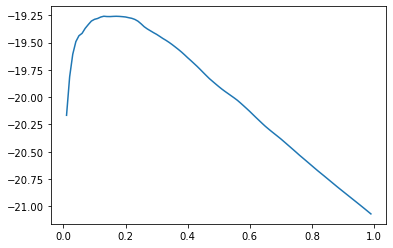

In [24]:
plt.plot(alpha,error)

In [25]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.257798


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-15.102976037874514

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [28]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
#test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14.452066753782246

In [31]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

56.25

In [32]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([56.25])

In [33]:
list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [34]:
X_test.iloc[1,:]

Rating               3.6
num_comp             0.0
hourly               0.0
employer_provided    0.0
same_state           1.0
                    ... 
job_simp_mle         0.0
job_simp_na          0.0
seniority_jr         0.0
seniority_na         1.0
seniority_senior     0.0
Name: 196, Length: 177, dtype: float64